# Lecture 4 notebook (Convolutional Neural Networks)
## Introduction to TensorFlow and Deep Learning

## IADS Summer School, 1st August 2022

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is a Jupyter Notebook to accompany Lecture 4 of the course

## Training a CNN vision Classifier

- Objectives: Learn more about CNN networks
- Co-objective: Learn about standard Keras vision benchmarks datasets - MNIST, CIFAR-10, Mnist-Fashion

### Instructions: 

1. Go through each code block, study and make sure you understand each of them, and fill in the missing "TODO" parts.

2. Work though the "checklist of things to do" in the final block of this page.

Before you start
- Check you have the python packages numpy, matplotlib, tensorflow.
- e.g. install them with "pip3 install numpy, matplotlib, tensorflow"

## Load a vision benchmark dataset

- We will start with the MNIST hand-written numeric digits dataset.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


dataset_name="mnist"
if dataset_name=="cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3. 
elif dataset_name=="fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
elif dataset_name=="mnist":
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    sys.exit(0)
(train_images0, train_labels0),(test_images0, test_labels0) = dataset.load_data()
print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))
train_labels=train_labels0.reshape(-1)
test_labels=test_labels0.reshape(-1)


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## Visualise the Dataset

- Show pictures of the images we are trying to learn...

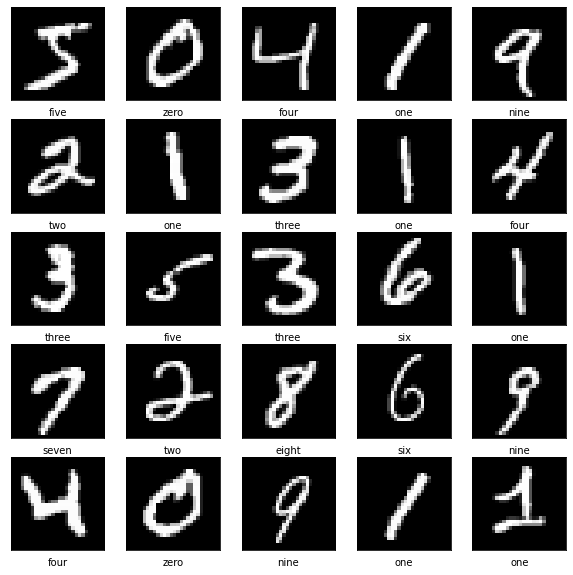

In [2]:
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

## Prep the data
- The keras datasets contain integer pixel intensities from 0 to 255.  We must rescale this to floats from 0 to 1.

In [3]:
# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=(test_images0/255.0).astype(np.float32) # 10000 test patterns, shape 10000*28*28  
train_images=(train_images0/255.0).astype(np.float32) # 60000 train patterns, shape 60000*28*28

if len(train_images.shape)==3:
    # add a single channel to these black-and-white images
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    print("Reshaped images from ",train_images0.shape,"to",train_images.shape,"so that 'channel' dimension exists")

num_classification_categories=train_labels.max()+1



Reshaped images from  (60000, 28, 28) to (60000, 28, 28, 1) so that 'channel' dimension exists


## Define a model
- Build our neural network here.
- Use relu activation functions everywhere, **except for the last layer which must have no activation function** (because the softmax is added in the training loop with the "SparseCategoricalCrossentropy(from_logits=True)" line below).
- use kernel size (3,3) for each convolutional layer, and pool size (2,2) for each max-pooling layer.  You can use any kind of padding or other options that you feel is reasonable.


In [4]:
# build FFNN with CNN architecture.  Add more layers here as you see fit to try to improve the final result.
# this model has one convolution and one maxpool layer
keras_model = keras.Sequential()
keras_model.add(layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu'))
keras_model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
keras_model.add(layers.Flatten())
keras_model.add(layers.Dense(128, activation='relu'))
keras_model.add(layers.Dense(num_classification_categories, activation=None))# Deliberately putting no activation function on the final layer because I use "fromLogits=True" below.  This trick aids numerical stability for autodiff

## View Model Summary

- have a look at the model summary here.

- Try to verify that the number of parameters of each layer matches what you calculate it should be.

In [5]:
keras_model.build(input_shape=(None,)+train_images.shape[1:])
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

## Train the network

In [6]:
optimizer=keras.optimizers.Adam()

keras_model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # From_logits=True tells the SparseCategoricalCrossEntropy function to apply its own softmax (because it wasn't done before).  This trick aids numerical stability.
              metrics=['accuracy'])

history = keras_model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))


Epoch 1/5
469/469 [==============================] - 12s 24ms/step - loss: 0.2338 - accuracy: 0.9325 - val_loss: 0.0983 - val_accuracy: 0.9713
Epoch 2/5
469/469 [==============================] - 12s 27ms/step - loss: 0.0740 - accuracy: 0.9780 - val_loss: 0.0614 - val_accuracy: 0.9806
Epoch 3/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0477 - accuracy: 0.9860 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0459 - val_accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 12s 26ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0478 - val_accuracy: 0.9836


## Plot graphs of learning progress...

- Have a look at these graphs, and try to work out whether any overfitting has occurred, or whether we would gain any benefit for training for more or fewer epochs (TODO)

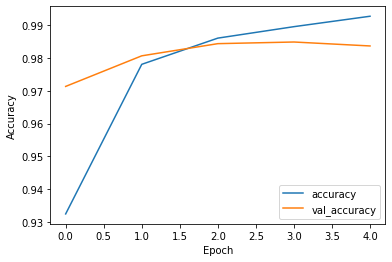

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


## Inspect how well the system is working...
- The test set has a lot of images in it, but we can only view 25 at a time.
- Hence rerun this code block several times, to get a different random set of samples from the test set (TODO)


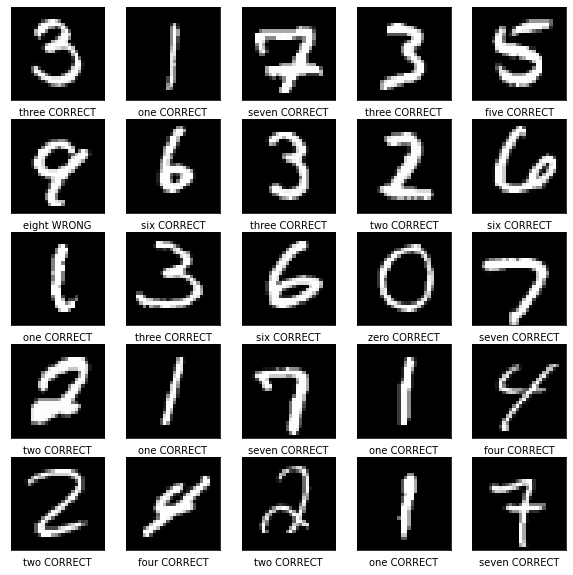

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        prediction=keras_model(test_images[i:i+1])[0,:]
        prediction_class=np.argmax(prediction)
        true_label=test_labels[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
plt.show()

## Define the neural network differently

Add more layers.

More layers increase accuracy of model.

In [9]:
# Create model (CNN network)
# two convolution and two maxpool layers and one dropout layer
keras_model = keras.Sequential()
keras_model.add(layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding="same", activation='relu'))
keras_model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
keras_model.add(layers.Conv2D(64, kernel_size=(5,5), strides=(1,1), padding="same", activation='relu'))
keras_model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
keras_model.add(layers.Flatten()) # will reshape each pattern from shape [7,7,64] to rank 1 
keras_model.add(layers.Dense(128, activation='relu'))
keras_model.add(layers.Dropout(rate=0.25))
keras_model.add(layers.Dense(num_classification_categories, activation=None))# Deliberately putting no activation function on the final layer because I use "fromLogits=True" below.  This trick aids numerical stability for autodiff

In [10]:
keras_model.build(input_shape=(None,)+train_images.shape[1:])
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [11]:
optimizer=keras.optimizers.Adam()

keras_model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # From_logits=True tells the SparseCategoricalCrossEntropy function to apply its own softmax (because it wasn't done before).  This trick aids numerical stability.
              metrics=['accuracy'])

history = keras_model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))


Epoch 1/5
469/469 [==============================] - 41s 87ms/step - loss: 0.1897 - accuracy: 0.9419 - val_loss: 0.0496 - val_accuracy: 0.9838
Epoch 2/5
469/469 [==============================] - 40s 86ms/step - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.0280 - val_accuracy: 0.9907
Epoch 3/5
469/469 [==============================] - 43s 93ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 4/5
469/469 [==============================] - 38s 80ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0272 - val_accuracy: 0.9911
Epoch 5/5
469/469 [==============================] - 41s 87ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0244 - val_accuracy: 0.9921


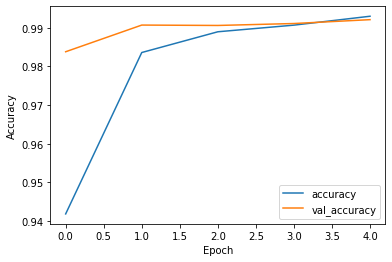

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


## Checklist of things to do

1. Check you have made 3 different vision classifiers; for Mnist, mnist-fashion and for cifar10.  No need to bother with cifar100. (TODO)

2. Check in each case you have inspected the results, the validation accuracy and decided whether more or fewer epochs would be required. (TODO)

3. If you have time remaining then see if you can improve performance on Cifar10.  Possible methods:  Try training for longer.  Add more convolutional layers.  Add more filters at each convolutional layer.    If you view the CNN structure used here: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ (read the final architecture he used at the bottom of the page) then you can see how to score >80% on CIFAR10.  But it requires a lot of CPU/GPU time to get there.  See the next note on google colab for free GPU usage.

4. Try running your notebook in **google colab**, for free extra GPU speed.  

5. If time permits, then see what the effect of changing the relu activation functions to tanh.

6. If time permits, then try removing all of the convolutional layers, and just have a fully-connected classifier.  Remember you still need the flatten layers though as these images are each rank3 tensors.


### mnist-fashion

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### load data ###

dataset_name="fashion"
if dataset_name=="cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3. 
elif dataset_name=="fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
elif dataset_name=="mnist":
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    sys.exit(0)
(train_images0, train_labels0),(test_images0, test_labels0) = dataset.load_data()
print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))
train_labels=train_labels0.reshape(-1)
test_labels=test_labels0.reshape(-1)


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


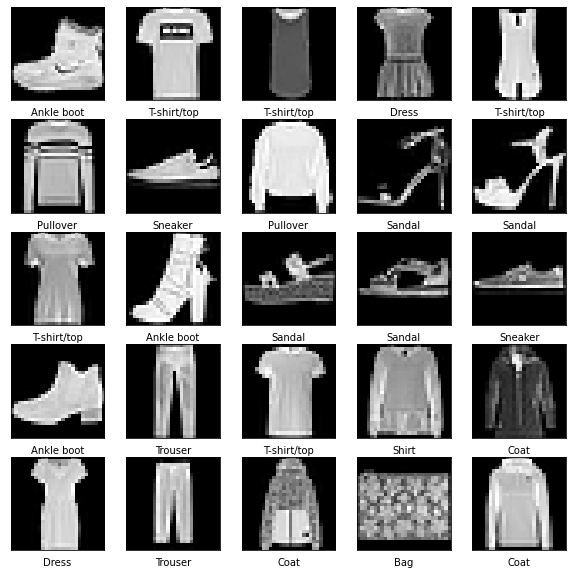

In [14]:
### visualise data ###
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
### prep data ###

# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=(test_images0/255.0).astype(np.float32) # 10000 test patterns, shape 10000*28*28  
train_images=(train_images0/255.0).astype(np.float32) # 60000 train patterns, shape 60000*28*28

if len(train_images.shape)==3:
    # add a single channel to these black-and-white images
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    print("Reshaped images from ",train_images0.shape,"to",train_images.shape,"so that 'channel' dimension exists")

num_classification_categories=train_labels.max()+1



Reshaped images from  (60000, 28, 28) to (60000, 28, 28, 1) so that 'channel' dimension exists


In [16]:
### define model ###
# build FFNN with CNN architecture.  Add more layers here as you see fit to try to improve the final result.
# this model has one convolution and one maxpool layer
keras_model = keras.Sequential()
keras_model.add(layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu'))
keras_model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
keras_model.add(layers.Flatten())
keras_model.add(layers.Dense(128, activation='relu'))
keras_model.add(layers.Dense(num_classification_categories, activation=None))# Deliberately putting no activation function on the final layer because I use "fromLogits=True" below.  This trick aids numerical stability for autodiff

In [17]:
### model summary ###
keras_model.build(input_shape=(None,)+train_images.shape[1:])
keras_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               802944    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
________________________________________________

In [18]:
### train the model ###
optimizer=keras.optimizers.Adam()

keras_model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # From_logits=True tells the SparseCategoricalCrossEntropy function to apply its own softmax (because it wasn't done before).  This trick aids numerical stability.
              metrics=['accuracy'])

history = keras_model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 11s 23ms/step - loss: 0.4335 - accuracy: 0.8481 - val_loss: 0.3391 - val_accuracy: 0.8802
Epoch 2/5
469/469 [==============================] - 11s 22ms/step - loss: 0.2913 - accuracy: 0.8963 - val_loss: 0.2967 - val_accuracy: 0.8956
Epoch 3/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2494 - accuracy: 0.9104 - val_loss: 0.2980 - val_accuracy: 0.8913
Epoch 4/5
469/469 [==============================] - 12s 26ms/step - loss: 0.2208 - accuracy: 0.9194 - val_loss: 0.2816 - val_accuracy: 0.8962
Epoch 5/5
469/469 [==============================] - 13s 27ms/step - loss: 0.1997 - accuracy: 0.9264 - val_loss: 0.2527 - val_accuracy: 0.9092


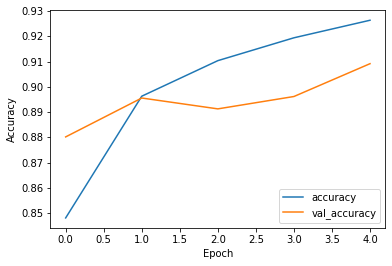

In [19]:
### plot learning progress ###
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

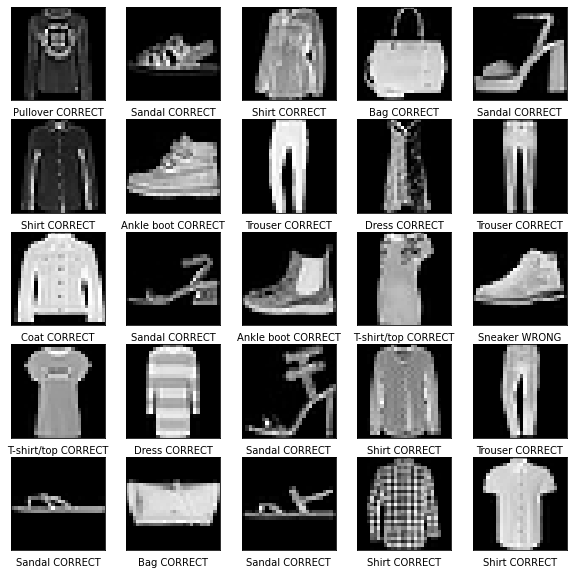

In [20]:
### inspect how well the model is working ###
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        prediction=keras_model(test_images[i:i+1])[0,:]
        prediction_class=np.argmax(prediction)
        true_label=test_labels[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
plt.show()

### cifar10

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### load data ###

dataset_name="cifar10"
if dataset_name=="cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3. 
elif dataset_name=="fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
elif dataset_name=="mnist":
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    sys.exit(0)
(train_images0, train_labels0),(test_images0, test_labels0) = dataset.load_data()
print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))
train_labels=train_labels0.reshape(-1)
test_labels=test_labels0.reshape(-1)


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


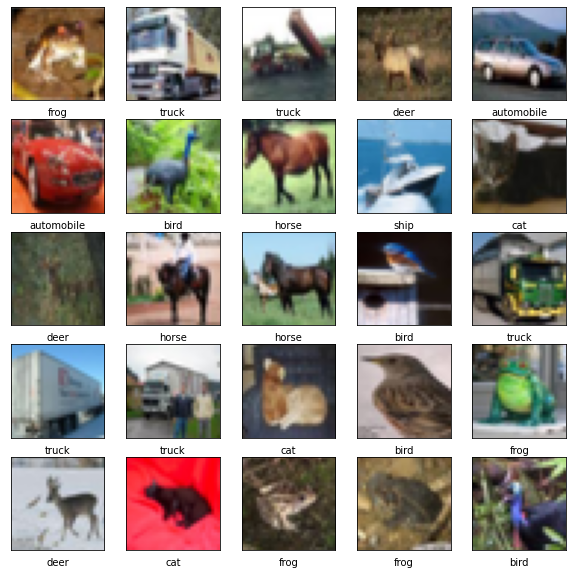

In [22]:
### visualise data ###
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
### prep data ###

# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=(test_images0/255.0).astype(np.float32) # 10000 test patterns, shape 10000*28*28  
train_images=(train_images0/255.0).astype(np.float32) # 60000 train patterns, shape 60000*28*28

if len(train_images.shape)==3:
    # add a single channel to these black-and-white images
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    print("Reshaped images from ",train_images0.shape,"to",train_images.shape,"so that 'channel' dimension exists")

num_classification_categories=train_labels.max()+1



In [24]:
### define model ###
# Create model (CNN network)
# two convolution and two maxpool layers and one dropout layer
keras_model = keras.Sequential()
keras_model.add(layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding="same", activation='relu'))
keras_model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
keras_model.add(layers.Conv2D(64, kernel_size=(5,5), strides=(1,1), padding="same", activation='relu'))
keras_model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same"))
keras_model.add(layers.Flatten()) # will reshape each pattern from shape [7,7,64] to rank 1 
keras_model.add(layers.Dense(128, activation='relu'))
keras_model.add(layers.Dropout(rate=0.25))
keras_model.add(layers.Dense(num_classification_categories, activation=None))# Deliberately putting no activation function on the final layer because I use "fromLogits=True" below.  This trick aids numerical stability for autodiff

In [25]:
### model summary ###
keras_model.build(input_shape=(None,)+train_images.shape[1:])
keras_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [26]:
### train the model ###
optimizer=keras.optimizers.Adam()

keras_model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # From_logits=True tells the SparseCategoricalCrossEntropy function to apply its own softmax (because it wasn't done before).  This trick aids numerical stability.
              metrics=['accuracy'])

history = keras_model.fit(train_images, train_labels,
                batch_size=128,
                epochs=10,
                validation_data=(test_images, test_labels))

Epoch 1/10
391/391 [==============================] - 46s 117ms/step - loss: 1.6100 - accuracy: 0.4182 - val_loss: 1.2529 - val_accuracy: 0.5619
Epoch 2/10
391/391 [==============================] - 44s 113ms/step - loss: 1.2248 - accuracy: 0.5663 - val_loss: 1.0720 - val_accuracy: 0.6201
Epoch 3/10
391/391 [==============================] - 45s 114ms/step - loss: 1.0804 - accuracy: 0.6214 - val_loss: 0.9703 - val_accuracy: 0.6615
Epoch 4/10
391/391 [==============================] - 41s 106ms/step - loss: 0.9725 - accuracy: 0.6598 - val_loss: 0.9361 - val_accuracy: 0.6704
Epoch 5/10
391/391 [==============================] - 44s 113ms/step - loss: 0.9018 - accuracy: 0.6863 - val_loss: 0.8895 - val_accuracy: 0.6882
Epoch 6/10
391/391 [==============================] - 44s 112ms/step - loss: 0.8299 - accuracy: 0.7092 - val_loss: 0.8933 - val_accuracy: 0.6934
Epoch 7/10
391/391 [==============================] - 43s 109ms/step - loss: 0.7723 - accuracy: 0.7288 - val_loss: 0.8323 - val_ac

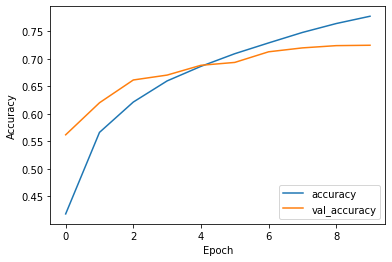

In [27]:
### plot learning progress ###
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

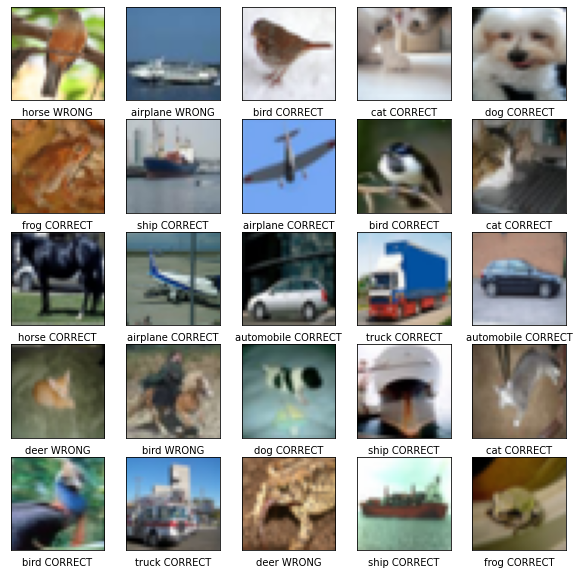

In [28]:
### inspect how well the model is working ###
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        prediction=keras_model(test_images[i:i+1])[0,:]
        prediction_class=np.argmax(prediction)
        true_label=test_labels[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
plt.show()